# MNIST Handwritten Digit Recognition Project using MLP & CNNs

In [2]:
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

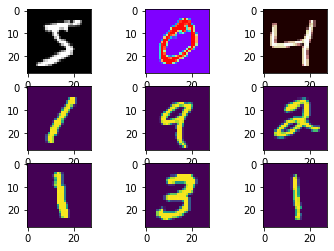

In [5]:
plt.subplot(331)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(X_train[1],cmap=plt.get_cmap('rainbow'))
plt.subplot(333)
plt.imshow(X_train[2],cmap=plt.get_cmap('pink'))
plt.subplot(334)
plt.imshow(X_train[3])
plt.subplot(335)
plt.imshow(X_train[4])
plt.subplot(336)
plt.imshow(X_train[5])
plt.subplot(337)
plt.imshow(X_train[6])
plt.subplot(338)
plt.imshow(X_train[7])
plt.subplot(339)
plt.imshow(X_train[8])

In [308]:
X_train[5].shape

(784,)

### MultiLayer Perceptron for recognizing handwritten digits (mnist Handwritten digit dataset)

In [6]:
import numpy as np

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [8]:
#random seed
np.random.seed(12)

In [9]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [10]:
#flatten each 28*28 images into 784 vectors
total_pixels=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],total_pixels).astype('float32')
X_test=X_test.reshape(X_test.shape[0],total_pixels).astype('float32')

In [11]:
#normalize input of range 0-255 to 0-1
X_train=X_train/255
X_test=X_test/255

In [12]:
#one hot encode the outputs
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [13]:
total_classes=y_test.shape[1]

In [14]:
#define simple model ( baseline model)
def baseline_model():
    model=Sequential()
    model.add(Dense(total_pixels,input_dim=total_pixels,init='normal',activation='relu'))
    model.add(Dense(total_classes,init='normal',activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [15]:
#build model
model=baseline_model()
model.fit(X_train,y_train,validation_data=(X_test,y_test),nb_epoch=10,batch_size=200,verbose=2)

/home/himalayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  after removing the cwd from sys.path.
/home/himalayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  """
/home/himalayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 28s - loss: 0.2757 - accuracy: 0.9208 - val_loss: 0.1378 - val_accuracy: 0.9594
Epoch 2/10
 - 8s - loss: 0.1107 - accuracy: 0.9689 - val_loss: 0.1012 - val_accuracy: 0.9694
Epoch 3/10
 - 8s - loss: 0.0692 - accuracy: 0.9798 - val_loss: 0.0718 - val_accuracy: 0.9778
Epoch 4/10
 - 8s - loss: 0.0490 - accuracy: 0.9857 - val_loss: 0.0698 - val_accuracy: 0.9783
Epoch 5/10
 - 9s - loss: 0.0350 - accuracy: 0.9902 - val_loss: 0.0648 - val_accuracy: 0.9796
Epoch 6/10
 - 9s - loss: 0.0254 - accuracy: 0.9933 - val_loss: 0.0629 - val_accuracy: 0.9808
Epoch 7/10
 - 9s - loss: 0.0192 - accuracy: 0.9952 - val_loss: 0.0622 - val_accuracy: 0.9816
Epoch 8/10
 - 11s - loss: 0.0145 - accuracy: 0.9967 - val_loss: 0.0621 - val_accuracy: 0.9801
Epoch 9/10
 - 10s - loss: 0.0112 - accuracy: 0.9976 - val_loss: 0.0599 - val_accuracy: 0.9813
Epoch 10/10
 - 9s - loss: 0.0078 - accuracy: 0.9985 - val_loss: 0.0621 - val_accuracy: 0.9814


In [16]:
scores=model.evaluate(X_test,y_test,verbose=0)
print("Baseline Model Error: %.2f%%" %(100-scores[1]*100))

Baseline Model Error: 1.86%


In [50]:
#making predictions on test data
predictions=model.predict([X_test])

In [51]:
predictions[2000]

array([7.8758497e-08, 1.2111745e-06, 2.1059890e-05, 1.9312633e-05,
       1.0673702e-05, 3.8144899e-05, 9.9979645e-01, 8.6170111e-08,
       1.1280059e-04, 2.2564591e-07], dtype=float32)

In [52]:
#the predicted digit
print(np.argmax(predictions[2000]))

6


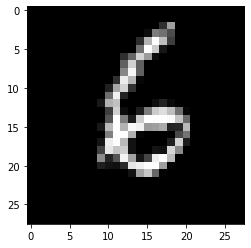

In [53]:
#plot to find what actually the digit is
plt.imshow(X_test[2000].reshape(28,28),cmap=plt.get_cmap('gray'))

In [55]:
predictions[9999]

array([4.1507339e-10, 3.8474158e-13, 2.5370204e-11, 1.0008225e-11,
       5.7218873e-08, 3.1304204e-10, 1.0000000e+00, 5.7656110e-15,
       9.2290524e-12, 1.7646464e-13], dtype=float32)

In [56]:
print(np.argmax(predictions[9999]))

6


In [248]:
plt.imshow(X_test[9999].reshape(28,28),cmap=plt.get_cmap('gray'))

ValueError: cannot reshape array of size 784 into shape (400,400)

3


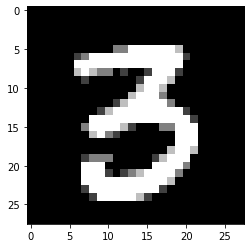

In [59]:
predictions[5555]
print(np.argmax(predictions[5555]))
plt.imshow(X_test[5555].reshape(28,28),cmap=plt.get_cmap('gray'))

3


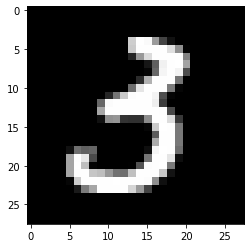

In [60]:
predictions[8876]
print(np.argmax(predictions[8876]))
plt.imshow(X_test[8876].reshape(28,28),cmap=plt.get_cmap('gray'))

6


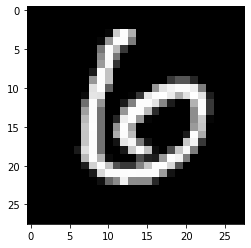

In [61]:
predictions[11]
print(np.argmax(predictions[11]))
plt.imshow(X_test[11].reshape(28,28),cmap=plt.get_cmap('gray'))